In [27]:
import pandas as pd
file_path = 'monthly.csv'

weather_data = pd.read_csv(file_path)

In [28]:
pd.set_option('display.max_rows', None)
print(weather_data.head(10))

      date  airt  f.airt  airtmax  f.airtmax  airtmin  f.airtmin  airtmmx  \
0  2001-03  30.0     NaN     39.0        NaN     22.0        NaN     54.3   
1  2001-04  44.5     NaN     56.7        NaN     32.3        NaN     84.6   
2  2001-05  56.9     NaN     68.3        NaN     45.9        NaN     87.6   
3  2001-06  66.2     NaN     77.3        NaN     56.0        NaN     87.3   
4  2001-07  65.4     NaN     77.0        NaN     54.8        NaN     90.9   
5  2001-08  70.2     NaN     81.1        NaN     61.1        NaN     92.5   
6  2001-09  59.9     NaN     70.8        NaN     49.8        NaN     82.8   
7  2001-10  50.6     NaN     61.6        NaN     40.7        NaN     76.3   
8  2001-11  42.7     NaN     52.0        NaN     33.5        NaN     66.9   
9  2001-12  33.5     NaN     41.1        NaN     26.3        NaN     67.8   

   f.airtmmx  airtmmn  ...  wspd  f.wspd  wres  f.wres  wdir  f.wdir  gspd  \
0        NaN      9.0  ...   4.8     1.0   1.0     1.0   328     1.0  42.7

In [29]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
print(weather_data.head(5))

        date  airt  f.airt  airtmax  f.airtmax  airtmin  f.airtmin  airtmmx  \
0 2001-03-01  30.0     NaN     39.0        NaN     22.0        NaN     54.3   
1 2001-04-01  44.5     NaN     56.7        NaN     32.3        NaN     84.6   
2 2001-05-01  56.9     NaN     68.3        NaN     45.9        NaN     87.6   
3 2001-06-01  66.2     NaN     77.3        NaN     56.0        NaN     87.3   
4 2001-07-01  65.4     NaN     77.0        NaN     54.8        NaN     90.9   

   f.airtmmx  airtmmn  ...  wspd  f.wspd  wres  f.wres  wdir  f.wdir  gspd  \
0        NaN      9.0  ...   4.8     1.0   1.0     1.0   328     1.0  42.7   
1        NaN     19.9  ...   4.0     1.0   0.9     1.0   300     1.0  36.0   
2        NaN     29.1  ...   3.5     NaN   0.2     NaN    60     NaN  29.1   
3        NaN     38.1  ...   2.7     NaN   0.5     NaN   204     NaN  23.5   
4        NaN     45.5  ...   2.7     NaN   0.7     NaN   238     NaN  23.7   

   f.gspd  s10t  f.s10t  
0     1.0   NaN       M  
1   

In [30]:
filtered_weather_data = weather_data[(weather_data['date'] >= '2016-01-01') & (weather_data['date'] <= '2023-12-31')]
print(filtered_weather_data.head(3))


          date  airt  f.airt  airtmax  f.airtmax  airtmin  f.airtmin  airtmmx  \
178 2016-01-01  25.6     NaN     33.6        NaN     17.6        NaN     55.2   
179 2016-02-01  28.1     NaN     38.7        NaN     17.5        NaN     60.8   
180 2016-03-01  38.2     NaN     49.0        NaN     29.0        NaN     75.4   

     f.airtmmx  airtmmn  ...  wspd  f.wspd  wres  f.wres  wdir  f.wdir  gspd  \
178        NaN      0.1  ...   4.3     NaN   1.7     NaN   269     NaN  38.5   
179        NaN    -17.7  ...   4.8     NaN   1.7     NaN   235     NaN  43.0   
180        NaN     14.5  ...   4.3     NaN   0.9     NaN   248     NaN  34.9   

     f.gspd  s10t  f.s10t  
178     NaN  34.9     NaN  
179     NaN  35.7     NaN  
180     NaN  40.7     NaN  

[3 rows x 29 columns]


In [31]:
print(filtered_weather_data.tail(3))

          date  airt  f.airt  airtmax  f.airtmax  airtmin  f.airtmin  airtmmx  \
269 2023-08-01  65.8     NaN     75.0        NaN     57.6        NaN     81.0   
270 2023-09-01  61.4     NaN     71.3        NaN     54.1        NaN     88.3   
271 2023-10-01  53.1     NaN     62.7        NaN     45.3        NaN     83.8   

     f.airtmmx  airtmmn  ...  wspd  f.wspd  wres  f.wres  wdir  f.wdir  gspd  \
269        NaN     49.6  ...   2.7     NaN   0.7     NaN   188     NaN  24.8   
270        NaN     42.1  ...   2.5     NaN   0.7     NaN    59     NaN  25.7   
271        NaN     28.6  ...   2.6     NaN   0.4     NaN   212     NaN  23.5   

     f.gspd  s10t  f.s10t  
269     NaN  70.9     NaN  
270     NaN  67.1     NaN  
271     NaN  58.5     NaN  

[3 rows x 29 columns]


In [32]:
weather_data = filtered_weather_data

The relevant features are as follows:

Independent variables:\
Atmospheric temperature (airt)\
Atmospheric pressure (bar)\
Rainfall (prec)\
Relative humiditiy (rh)\
Wind speed (wspd)\
Global solar radiation (slrt)\
Sunshine duration (missing)\
Month (date.dt.month)

Dependent variable:

soil temperature (s10t)

We can remove all of the other rows

In [33]:
selected_columns = ['date','airt', 'prec','slrt','wspd','s10t']
weather_data = weather_data[selected_columns]
print(weather_data.head(3))

          date  airt  prec  slrt  wspd  s10t
178 2016-01-01  25.6  1.57   6.7   4.3  34.9
179 2016-02-01  28.1  4.24   9.1   4.8  35.7
180 2016-03-01  38.2  3.39  13.6   4.3  40.7


In [36]:
cold_start_date = pd.Timestamp('2001-10-01')
cold_end_date = pd.Timestamp('2002-03-31')

warm_start_date = pd.Timestamp('2001-04-01')
warm_end_date = pd.Timestamp('2001-09-30')

# Filter the data for cold months (October to March)
weather_data['month'] = weather_data['date'].dt.month

# Define cold months (October to March)
cold_months_data = weather_data[(weather_data['month'] >= 10) | (weather_data['month'] <= 3)]
# Filter the data for warm months (April to September)
warm_months_data = weather_data[(weather_data['date'] >= warm_start_date) & (weather_data['date'] <= warm_end_date)]

/var/folders/x_/r4lb4fhx2_v2lsqr7mkf3v400000gn/T/ipykernel_5104/3210123402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['month'] = weather_data['date'].dt.month


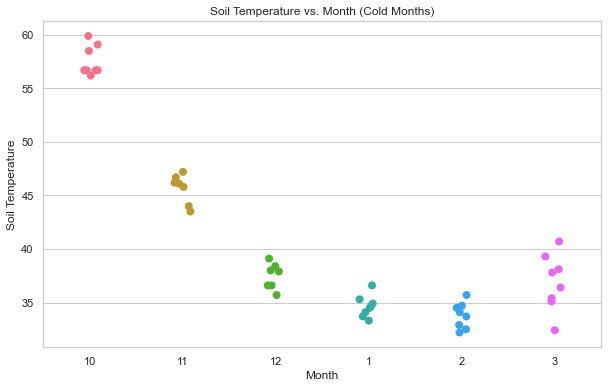

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
custom_order = [10, 11, 12, 1, 2, 3]

# Create a strip plot using Seaborn with custom order
plt.figure(figsize=(10, 6))
sns.stripplot(x='month', y='s10t', data=cold_months_data, size=8, order=custom_order, palette='husl', jitter=True)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Soil Temperature')
plt.title('Soil Temperature vs. Month (Cold Months)')

# Show the plot
plt.show()